In [114]:
# Import all necessary libraries.
import pydot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image  
import pydot
from sklearn.externals.six import StringIO  
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report

In [115]:
# Define the number of examples.
N = 500
# Create the dataset.
x, y = make_moons(n_samples = N, noise = 0.30, random_state=42)

In [116]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

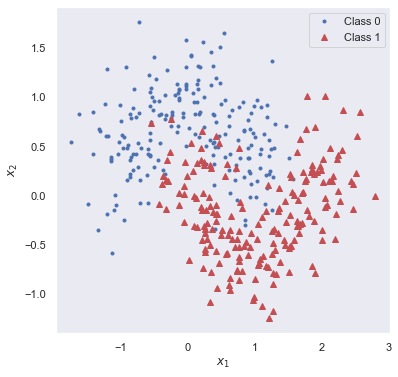

In [117]:
# Plot training data set.
idx0 = np.argwhere(y_train == 0)
idx1 = np.argwhere(y_train == 1)

fig = plt.figure(figsize=(6,6))
plt.plot(x_train[idx0,0], x_train[idx0,1], 'b.', label='Class 0')
plt.plot(x_train[idx1,0], x_train[idx1,1], 'r^', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.legend()
#plt.savefig('Distribution_of_classes_for_train_set', dpi=600)
plt.show()

## Decision Tree and Accuracy of Test Set

In [118]:
# Create classifier.
dtc = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training features and labels.
dtc.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred_dtc = dtc.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred_dtc)

print('Accuracy for test data:', accuracy*100,'%')

Accuracy for test data: 82.0 %


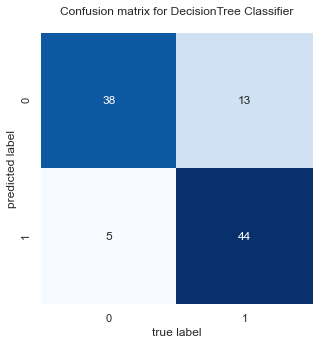

In [119]:
# Plot the confusion matrix for DecisionTree Classifier.

fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred_dtc)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Confusion matrix for DecisionTree Classifier\n")
plt.savefig('confusion_matrix_DecisionTree Classifier.png', dpi=600)
plt.show()

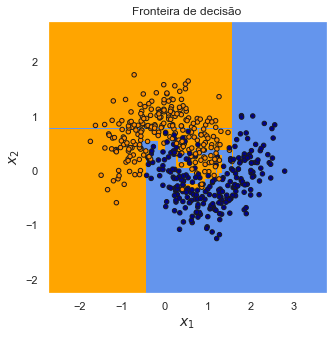

In [120]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(5, 5))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("Fronteira de decisão")

plt.show()

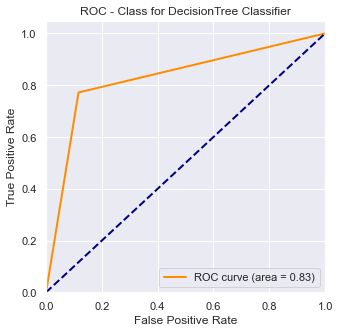

In [121]:
# Getting the probabilities for each class.
y_prob = dtc.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class for DecisionTree Classifier')
plt.legend(loc="lower right")

#plt.savefig('roc_for DecisionTree Classifier.png', dpi=600)
plt.show()

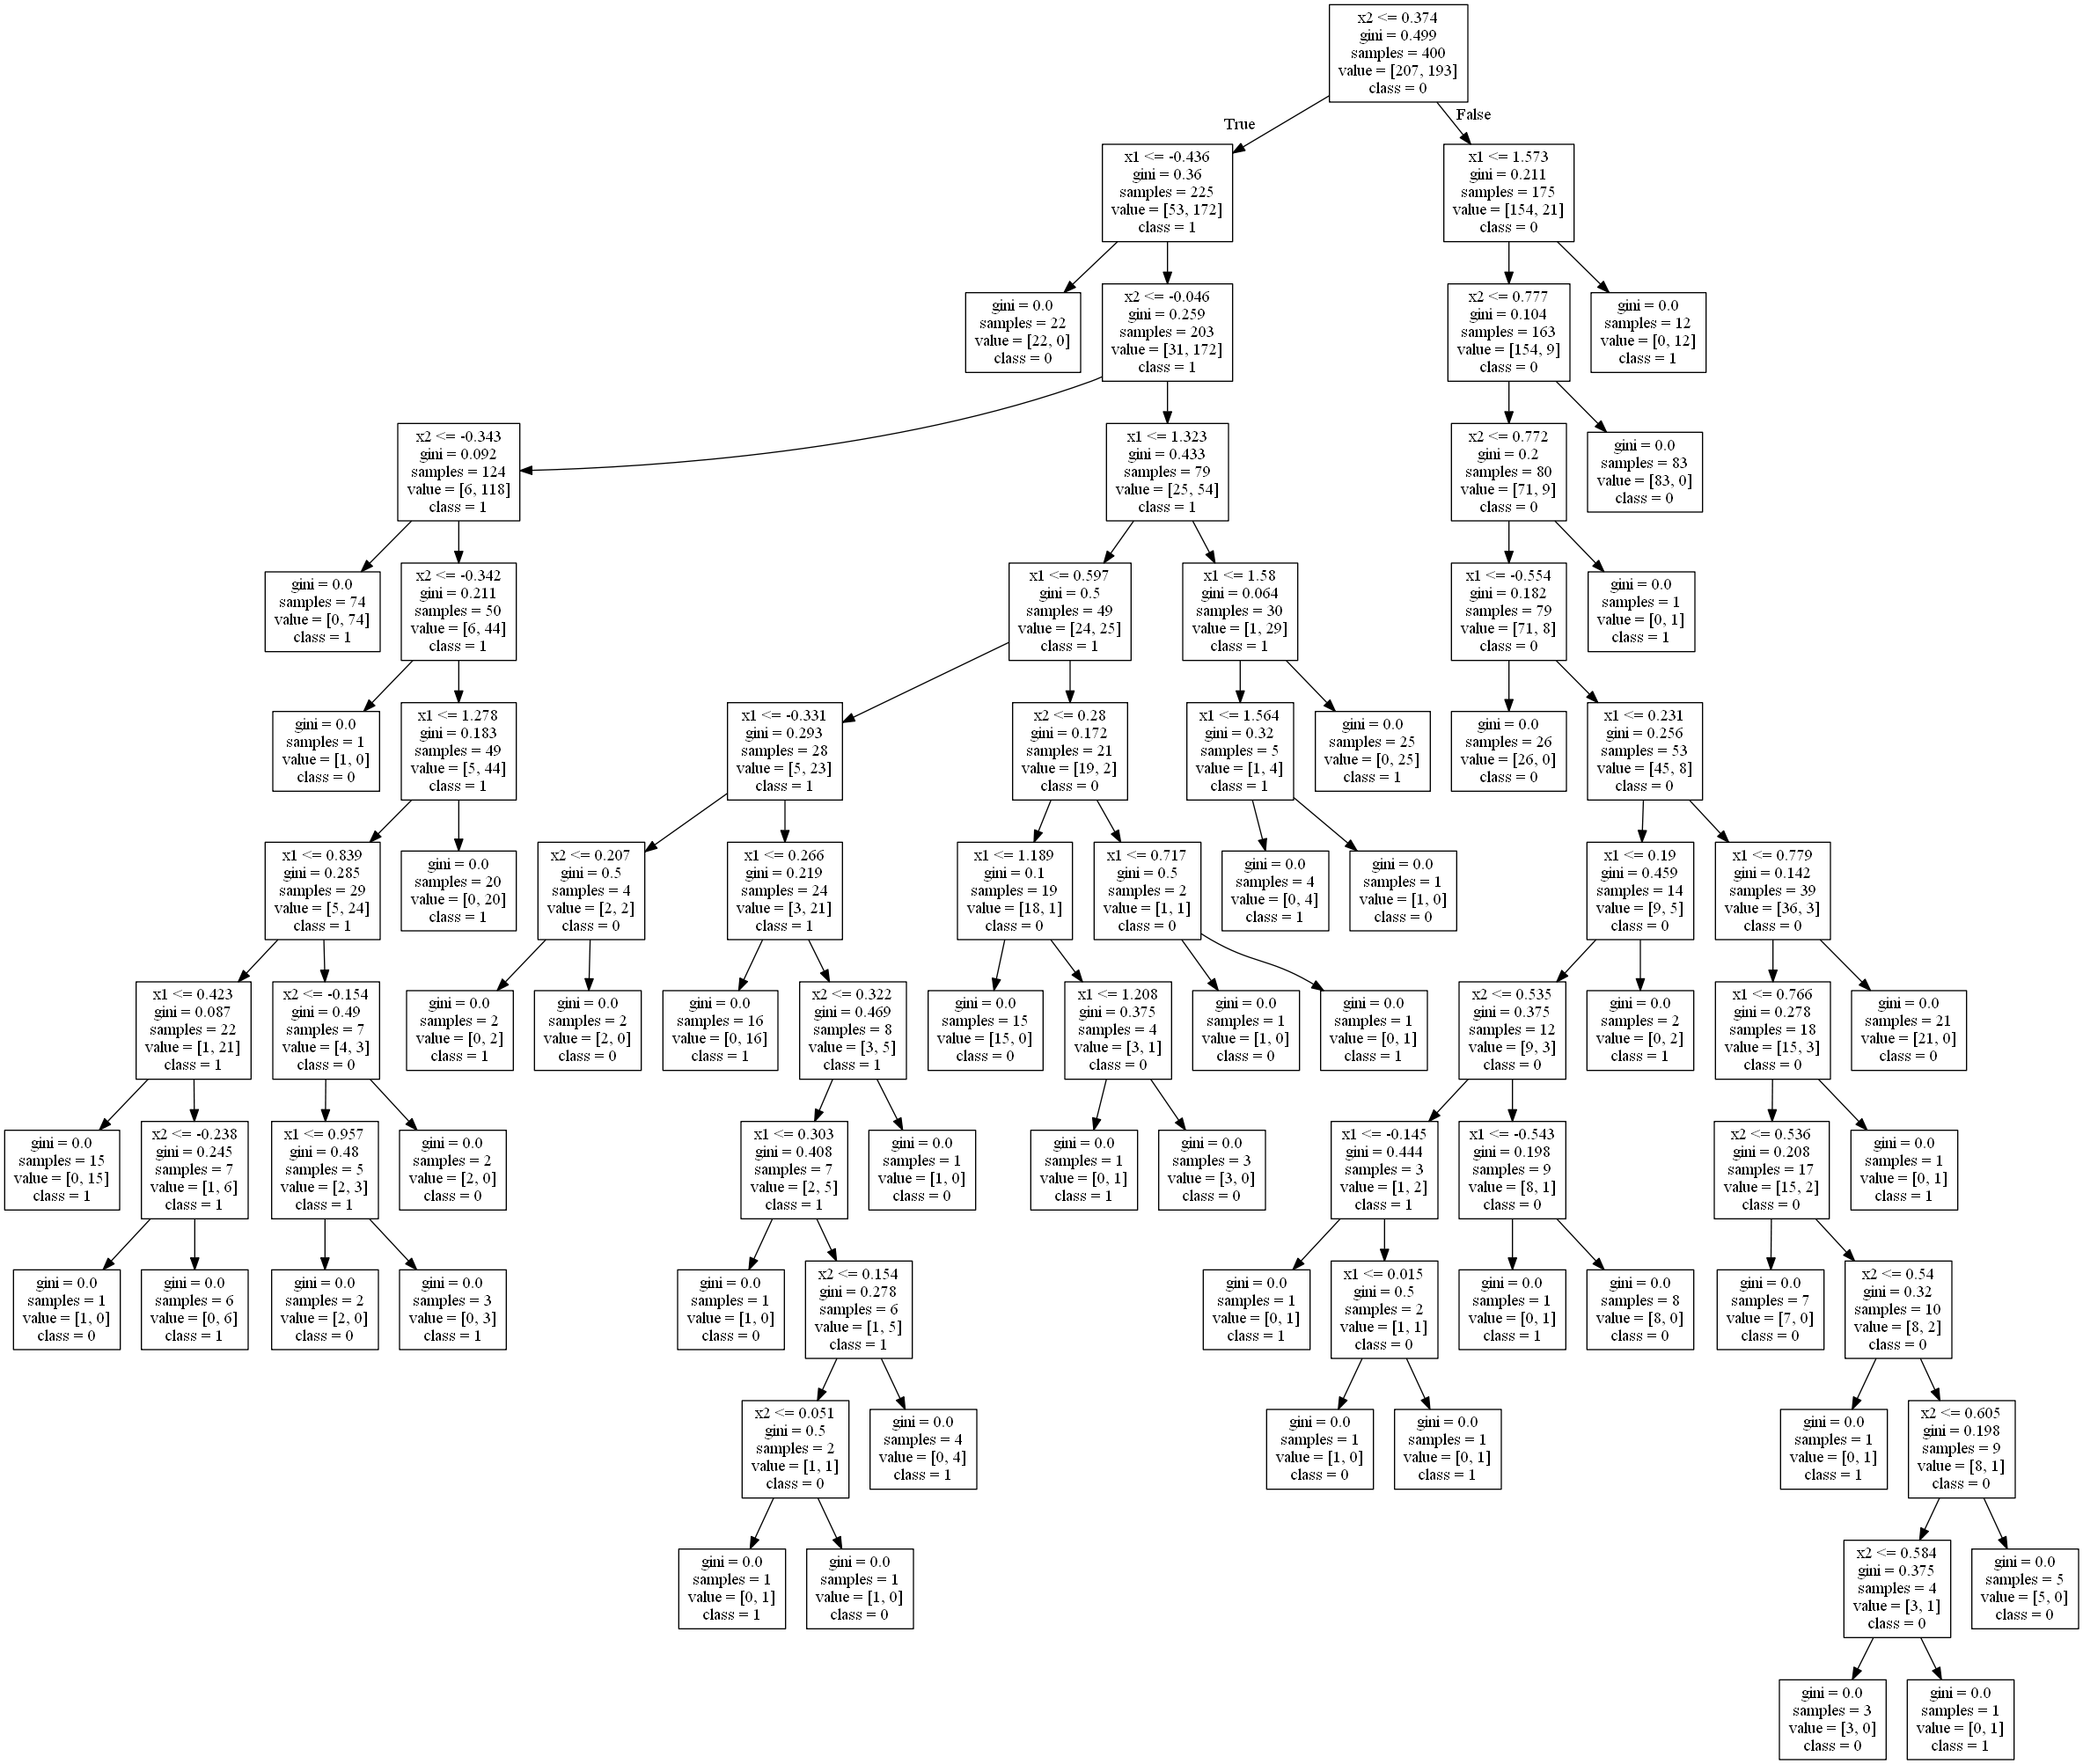

In [122]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(dtc, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Bagging ensemble

In [123]:
# Instance and Train model for Bagging Classifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

# Fit the classifier on the training features and labels.
bag_clf.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred_bag = bag_clf.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred_bag)

print('Accuracy for test data:', accuracy*100,'%')

Accuracy for test data: 90.0 %


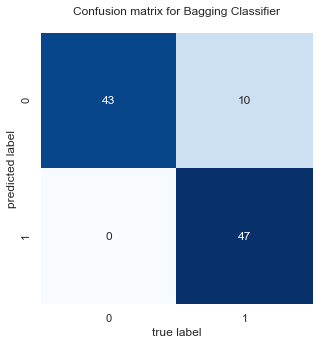

In [124]:
# Plot the confusion matrix for Bagging Classifier.

fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred_bag)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Confusion matrix for Bagging Classifier\n")
plt.savefig('confusion_matrix_Bagging Classifier.png', dpi=600)
plt.show()

(251, 327)


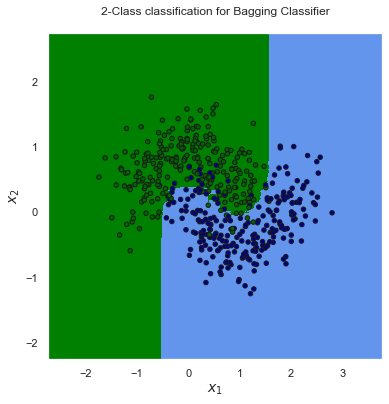

In [125]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['green', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkgreen', 'c', 'darkblue'])

plt.figure(figsize=(6, 6))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])

print(xx.shape)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification for Bagging Classifier\n")

#plt.savefig('Bagging_Classifier_boundary.png', dpi=600)
plt.show()

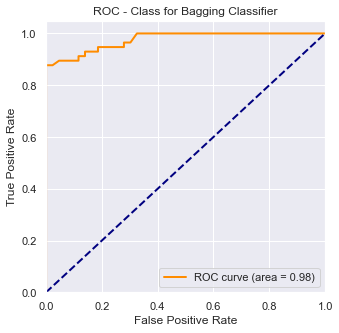

In [126]:
# Getting the probabilities for each class.
y_prob = bag_clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class for Bagging Classifier')
plt.legend(loc="lower right")

#plt.savefig('roc_for Bagging Classifier.png', dpi=600)
plt.show()

**h. Analisando-se as figuras da fronteira de decisão dos 2 classificadores, qual deles irá generaliza melhor? Por quê?**

R: Analisando as figuras da fronteira de decisão, percebemos que Bagging ensemble generaliza melhor que a árvore de decisão porque o limite de decisão é menos regular. Isso deve-se à maior diversidade que é usada no bagging ensemble.